TEMPERATURA 700HPA

-53.26124572753906 23.324676513671875


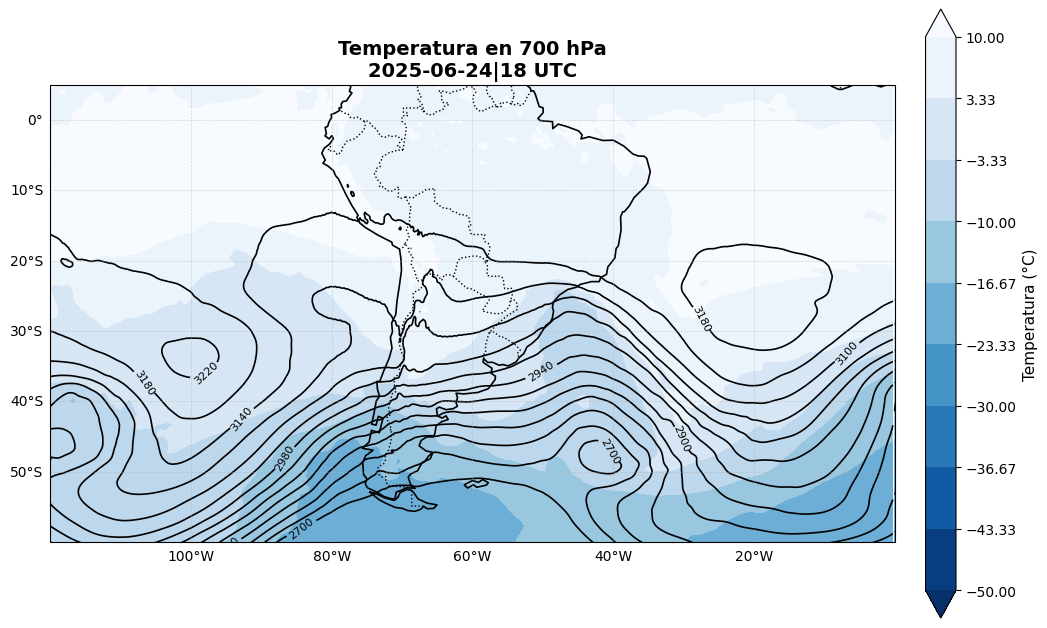

-50.17024230957031 22.804351806640625


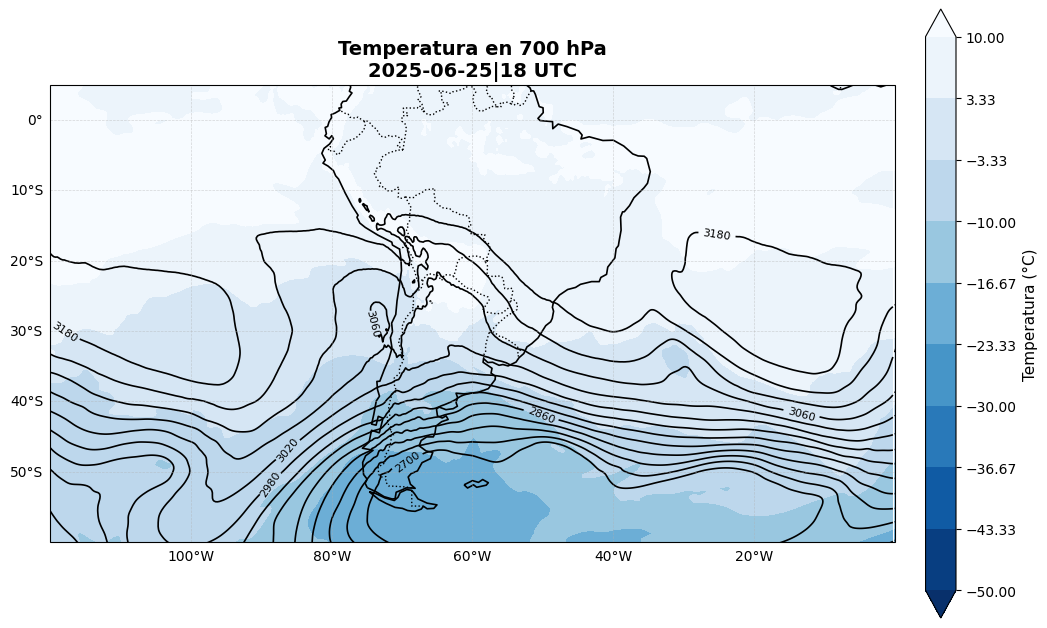

-54.336456298828125 22.477996826171875


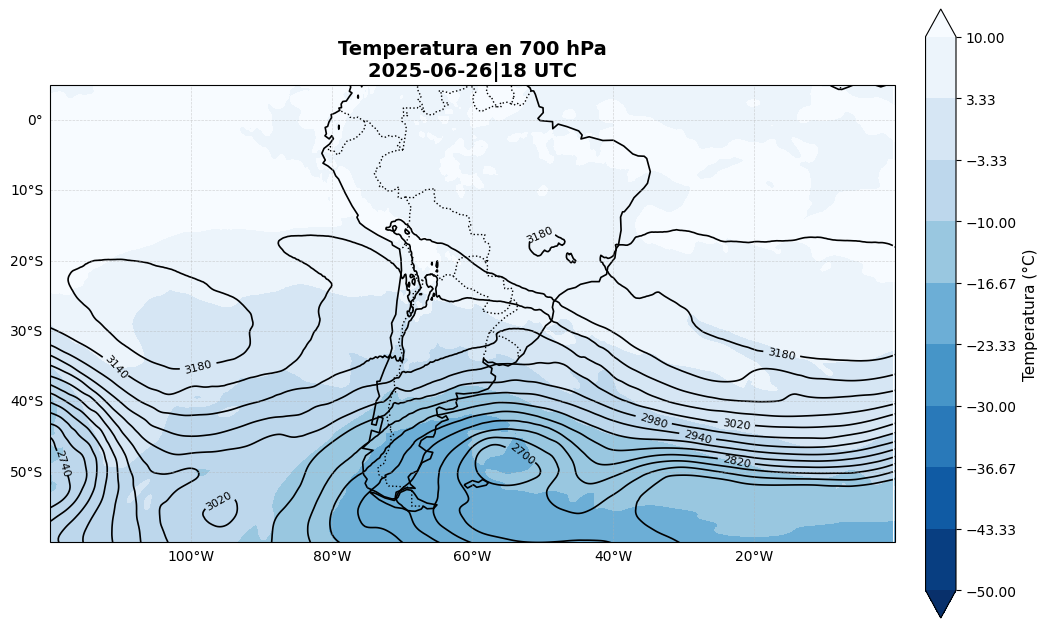

In [3]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Carga de dataset
ds = xr.open_dataset("ERA_2025_final2.nc")
# Se verifica que exista la versión expver, necesario para data con vacios
if 'expver' in ds.dims:
    ds = ds.isel(expver=0)

# Temperatura y Geopotencial en 700 hPa
t700 = ds['t'].sel(pressure_level=700)
z700 = ds['z'].sel(pressure_level=700) / 9.81  # metros

# Filtro de fechas de analisis
t700 = t700.sel(valid_time=slice("2025-06-24", "2025-06-26"))
z700 = z700.sel(valid_time=slice("2025-06-24", "2025-06-26"))

# Extrae la hora sinóptica de interés
t700_hour = t700.where(t700['valid_time'].dt.hour == 18, drop=True)
z700_hour = z700.where(z700['valid_time'].dt.hour == 18, drop=True)

# Loop
for i in range(len(t700_hour['valid_time'])): # Itera sobre cada fecha de interés
    # Variables a usar (temperatura y geopotencial)
    T = t700_hour.isel(valid_time=i) - 273.15  # Conversión de K a °C
    Z = z700_hour.isel(valid_time=i)

    print(float(T.min()), float(T.max())) # Se imprime el rango de temperatura

    fecha = str(T['valid_time'].values)[:10] # Obtención del datetime
    # Creación del mapa
    fig = plt.figure(figsize=(11, 9)) 
    ax = plt.axes(projection=ccrs.PlateCarree()) # Proyección
    # Define el dominio del mapa para toda Sudamérica
    ax.set_extent([-120, 0, -60, 5], crs=ccrs.PlateCarree())

    # Sombreado de temperatura
    levels_T = np.linspace(-50, 10, 10)

    cf = ax.contourf(
        T.longitude, T.latitude, T,
        levels=levels_T,
        cmap="Blues_r",
        extend="both",
        transform=ccrs.PlateCarree()
    )

    # Contornos de geopotencial
    levels_Z = np.arange(2700, 3300, 40)

    cs = ax.contour(
        Z.longitude, Z.latitude, Z,
        levels=levels_Z,
        colors='black',
        linewidths=1.2,
        transform=ccrs.PlateCarree()
    )
    ax.clabel(cs, fmt="%d", fontsize=8)

    # Delimitación continente - océano/fronteras
    ax.add_feature(cfeature.COASTLINE, linewidth=1.2)
    ax.add_feature(cfeature.BORDERS, linestyle=':', linewidth=1)
    ax.add_feature(cfeature.LAND, facecolor='lightgray', alpha=0.2)
    
    # Coordenadas
    gl = ax.gridlines(
        draw_labels=True,
        linewidth=0.5,
        linestyle='--',
        alpha=0.5
    )

    gl.top_labels = False
    gl.right_labels = False

    # Barra de color
    cb = plt.colorbar(cf, orientation='vertical', pad=0.03, shrink=0.7)
    cb.set_label("Temperatura (°C)", fontsize=11)

    # Título
    plt.title(f"Temperatura en 700 hPa\n{fecha}|18 UTC",
              fontsize=14, weight='bold')

    plt.tight_layout()
    plt.show()

ESPESOR 700-500 hPa

2025-06-24 | Espesor min: 2274.6 m  max: 2824.4 m


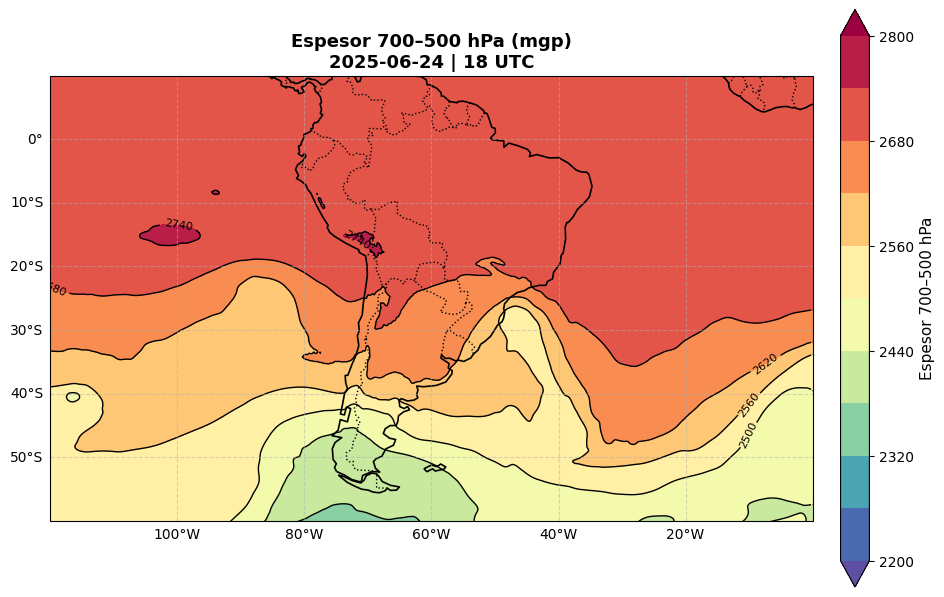

2025-06-25 | Espesor min: 2281.4 m  max: 2827.3 m


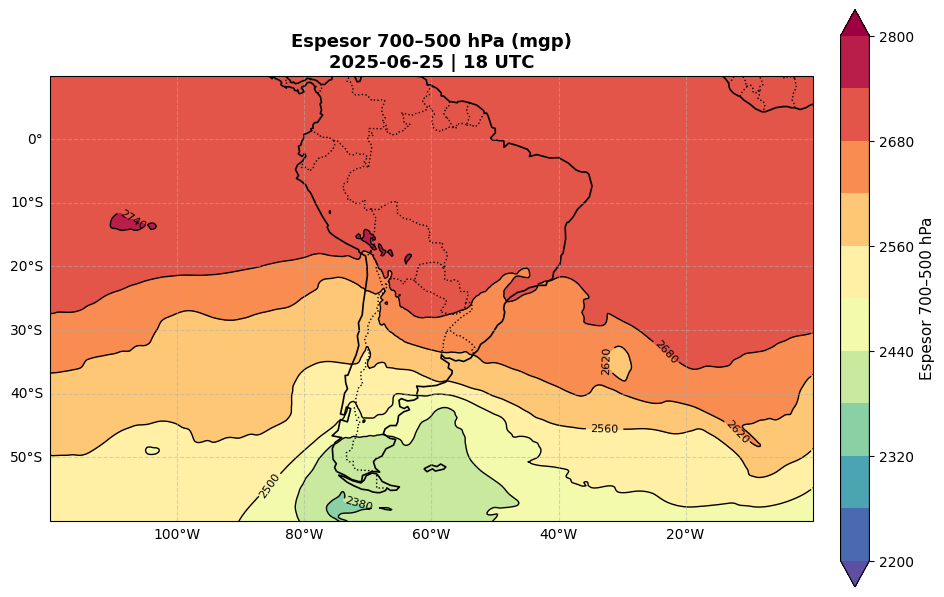

2025-06-26 | Espesor min: 2275.9 m  max: 2829.1 m


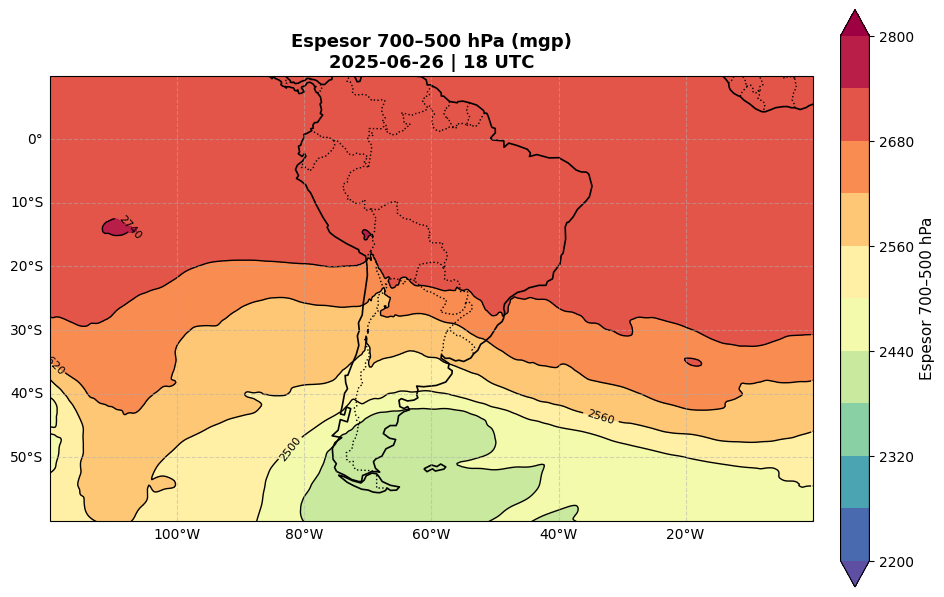

In [ ]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Carga de dataset
ds = xr.open_dataset("ERA_2025_final2.nc")
# Se verifica que exista la versión expver, necesario para data con vacios
if 'expver' in ds.dims:
    ds = ds.isel(expver=0)

# Geopotencial en los niveles de 700 y 500 hPa
z500 = ds['z'].sel(pressure_level=500) / 9.81
z700 = ds['z'].sel(pressure_level=700) / 9.81

# Filtro de fechas de analisis
z500 = z500.sel(valid_time=slice("2025-06-24", "2025-06-26"))
z700 = z700.sel(valid_time=slice("2025-06-24", "2025-06-26"))

# Extrae la hora sinóptica de interés
z500_12 = z500.where(z500['valid_time'].dt.hour == 18, drop=True)
z700_12 = z700.where(z700['valid_time'].dt.hour == 18, drop=True)

# Cálculo del espesor
thickness = z500_12 - z700_12  # metros

# Loop de gráficos
for i in range(len(thickness['valid_time'])): # Itera sobre cada fecha de interés

    TH = thickness.isel(valid_time=i) # Extrae el espesor de un día
    fecha = str(TH['valid_time'].values)[:10] # Convierte la fecha en texto
    # Identificamos el rango de espesor
    print(f"{fecha} | Espesor min: {float(TH.min()):.1f} m  max: {float(TH.max()):.1f} m")
    # Ploteo del mapa
    fig = plt.figure(figsize=(10, 8))
    ax = plt.axes(projection=ccrs.PlateCarree())

    # Dominio de todo Sudamérica
    ax.set_extent([-120, 0, -60, 10], crs=ccrs.PlateCarree())

    # Se define los niveles de espesor
    levels_th = np.arange(2200, 2850, 60)
    # Sombreado del espesor
    cf = ax.contourf(
        TH.longitude, TH.latitude, TH,
        levels=levels_th,
        cmap="Spectral_r",
        extend="both",
        transform=ccrs.PlateCarree()
    )
    # Contorno de geopotencial
    cs = ax.contour(
        TH.longitude, TH.latitude, TH,
        levels=levels_th,
        colors='black',
        linewidths=1.0,
        transform=ccrs.PlateCarree()
    )

    ax.clabel(cs, fmt="%d", fontsize=8)


    # Delimita continete - océano y fronteras entre países
    ax.add_feature(cfeature.COASTLINE, linewidth=1.2)
    ax.add_feature(cfeature.BORDERS, linestyle=':', linewidth=1)
    ax.add_feature(cfeature.LAND, facecolor='lightgray', alpha=0.2)
    # Grillas
    gl = ax.gridlines(draw_labels=True, linestyle='--', alpha=0.5)
    gl.top_labels = False
    gl.right_labels = False
    # Barra de colores
    cb = plt.colorbar(cf, orientation='vertical', pad=0.03, shrink=0.75)
    cb.set_label("Espesor 700–500 hPa", fontsize=11)
    # Título del mapa
    plt.title(f"Espesor 700–500 hPa (mgp)\n{fecha} | 18 UTC",
              fontsize=13, weight='bold')

    plt.tight_layout()
    plt.show()